In [ ]:
#imports for pandas, numpy, matplotlib, MinMaxScaler, Sequential, LSTM, and Dense.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
#import dataset
df=pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
df.head()     #to display top 5 rows of dataset

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


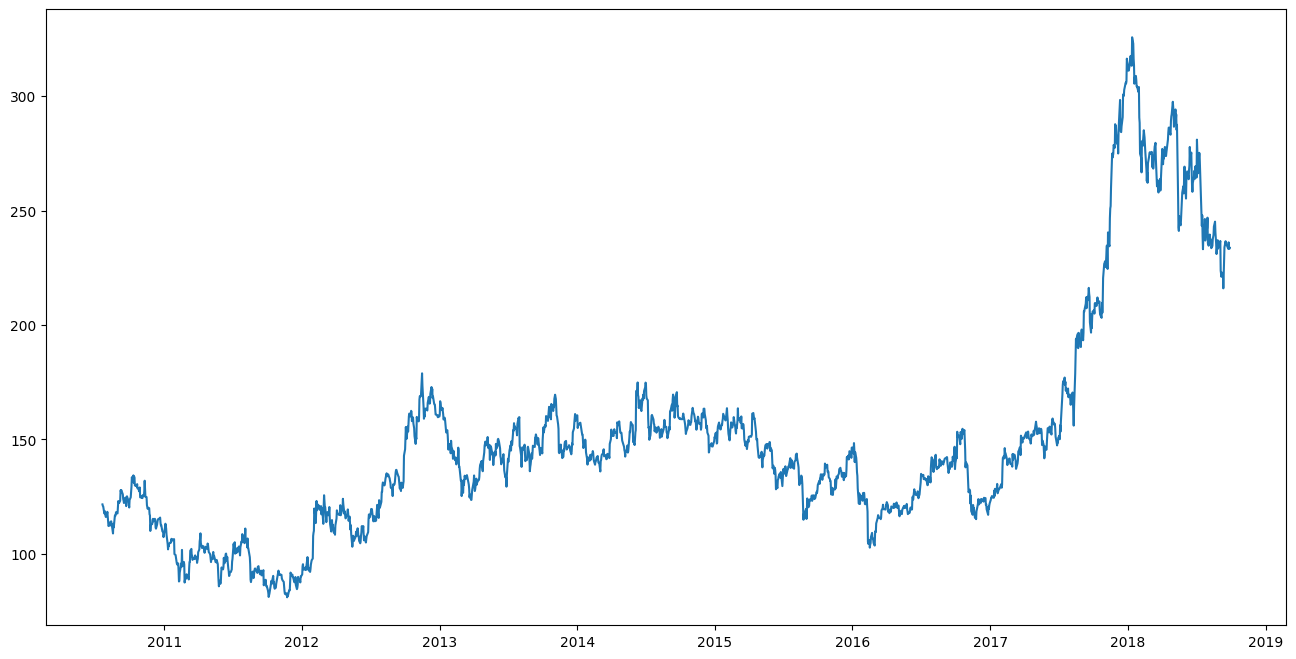

In [ ]:
#visualize the historical trend of the closing prices for the stock.
#converted "Date" column into datatime format and set it as index of df

df['Date']=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

#create a line plot of 'Close' over time
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price History')   #date on x "axis" and "close" on y axis


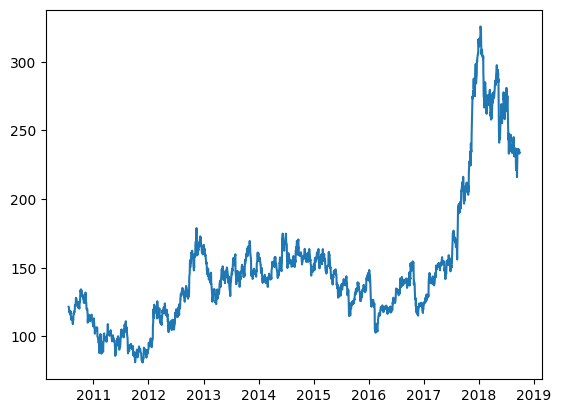

In [ ]:
plt.plot(df['Close'])  #plot of "close" prices

In [ ]:
#to scale 'close' prices
#scaling is done to transform the data to a specified range (usually between 0 and 1)
scalar=MinMaxScaler(feature_range=(0,1))
df1 = scalar.fit_transform(np.array(df['Close']).reshape(-1, 1))
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [ ]:
#splitting data into train and test

In [ ]:
#splitting your scaled data (df1) into training and test sets.
training_size=int(len(df1)*0.70)    #setting training set to 70%
test_size=len(df1)-training_size  #setting test set to 30%

train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size

(1424, 611)

In [ ]:
#to create input-output pairs for training a time series forecasting model, as an LSTM.

def create_dataset(dataset,time_step=1):
        dataX,dataY=[],[]                         #dataX to take input,dataY for target values
        for i in range(len(dataset)-time_step-1):
            a=dataset[i:(i+time_step),0]
            dataX.append(a)
            dataY.append(dataset[i+time_step,0])
        return np.array(dataX),np.array(dataY)

In [ ]:
time_step=100         #implements the sliding window approach,by taking raw time series data and creates overlapping sequences of length time_step
X_train,y_train=create_dataset(train_data,time_step)
X_test,ytest=create_dataset(test_data,time_step)

In [ ]:
print(X_train.shape),print(y_train.shape) #Printing the shapes of X_train and y_train


(1323, 100)
(1323,)


(None, None)

In [ ]:
print(X_test.shape),print(ytest.shape)

(510, 100)
(510,)


(None, None)

In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)     #Reshaping is common when working with time series data and deep learning models.
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
 # Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
X_test, y_test = create_dataset(test_data, time_step)



In [ ]:
# Train model
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)


Epoch 1/100
21/21 [==============================] - 3s 124ms/step - loss: 2.0931e-04 - val_loss: 1.7817e-04
Epoch 2/100
21/21 [==============================] - 3s 123ms/step - loss: 2.6208e-04 - val_loss: 2.5572e-04
Epoch 3/100
21/21 [==============================] - 3s 127ms/step - loss: 2.1958e-04 - val_loss: 1.9868e-04
Epoch 4/100
21/21 [==============================] - 3s 143ms/step - loss: 2.3367e-04 - val_loss: 2.7092e-04
Epoch 5/100
21/21 [==============================] - 3s 122ms/step - loss: 2.2176e-04 - val_loss: 1.6741e-04
Epoch 6/100
21/21 [==============================] - 3s 121ms/step - loss: 2.7830e-04 - val_loss: 3.7522e-04
Epoch 7/100
21/21 [==============================] - 4s 183ms/step - loss: 2.6692e-04 - val_loss: 2.0969e-04
Epoch 8/100
21/21 [==============================] - 3s 142ms/step - loss: 2.1829e-04 - val_loss: 2.0839e-04
Epoch 9/100
21/21 [==============================] - 3s 123ms/step - loss: 2.2043e-04 - val_loss: 1.6225e-04
Epoch 10/100
21/21 

In [ ]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

16/16 [==============================] - 1s 31ms/step


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(df['Close']).reshape(-1, 1))

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


In [ ]:
# Calculate RMSE,Root Mean Square Error
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Training RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
 # the average magnitude of the errors between predicted values and actual values

Training RMSE: 165.10457008764467
Test RMSE: 108.17040199237974


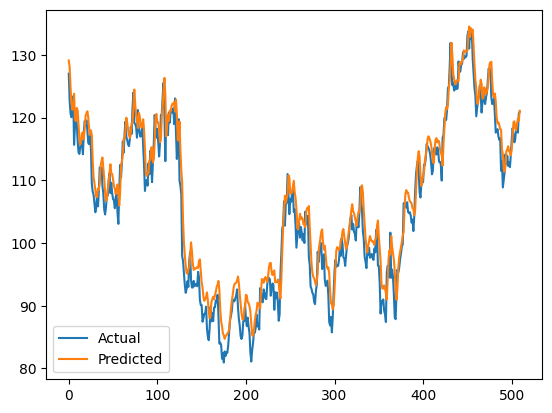

In [ ]:
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual') #visualizing the actual and predicted values of your time series data.
plt.plot(test_predict, label='Predicted')
plt.legend()
plt.show() #compares the actual values with the predicted values.

In [ ]:
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print(f'Test RMSE: {test_rmse}')


Test RMSE: 108.17040199237974


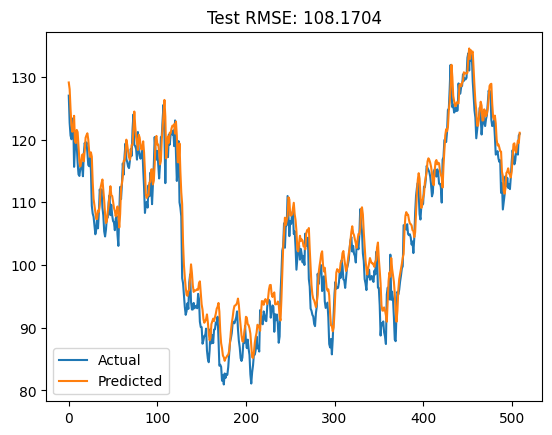

In [ ]:
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')    #prediction model's performance  on the visualization.
plt.plot(test_predict, label='Predicted')
plt.legend()
plt.title(f'Test RMSE: {test_rmse:.4f}')
plt.show()